In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, roc_curve, auc

In [19]:
data = pd.read_csv('liver_patient (1).csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [20]:
data=data.drop(columns=['Age','Gender'])
data.head()

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Q1

In [21]:
y = data['liver_disease']  # Target variable
X = data.drop(columns=['liver_disease'])  # Features only

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
print(X_scaled.head())

   Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0         0.004021          0.000000              0.060576   
1         0.140751          0.275510              0.310699   
2         0.092493          0.204082              0.208598   
3         0.008043          0.015306              0.058134   
4         0.046917          0.096939              0.064485   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                  0.003015                    0.001626        0.594203   
1                  0.027136                    0.018296        0.695652   
2                  0.025126                    0.011791        0.623188   
3                  0.002010                    0.002033        0.594203   
4                  0.008543                    0.009961        0.666667   

    Albumin  Albumin_and_Globulin_Ratio  
0  0.521739                       0.240  
1  0.500000                       0.176  
2  0.521739                       0.236  
3  0.543

In [23]:
logisticR = LogisticRegression()
logisticR.fit(X_train, y_train)
accuracy = logisticR.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.6667


In [24]:
kfold_validation = KFold(n_splits=5, shuffle=True, random_state=42)
kfold_results = cross_val_score(logisticR, X_train, y_train, scoring='accuracy', cv=kfold_validation)
print("Cross-validation accuracy scores:", kfold_results)
print("Mean Accuracy:", np.mean(kfold_results))

Cross-validation accuracy scores: [0.74468085 0.70967742 0.70967742 0.65591398 0.80645161]
Mean Accuracy: 0.7252802562342712


In [25]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_results = cross_val_score(logisticR, X_train, y_train, scoring='accuracy', cv=skf)
print("Stratified CV Scores:", skf_results)
print("Mean accuracy:", skf_results.mean())

Stratified CV Scores: [0.72340426 0.72043011 0.72043011 0.7311828  0.7311828 ]
Mean accuracy: 0.7253260123541525


### Q2

In [26]:
y = data['liver_disease']
X = data.drop(columns=['liver_disease'])

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
logisticR = LogisticRegression()
logisticR.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = logisticR.predict(X_test)

In [31]:
accuracy = logisticR.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.7436


In [32]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

Confusion Matrix: [[ 0 30]
 [ 0 87]]


In [33]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.7436
Recall: 1.0000
F1 Score: 0.8529


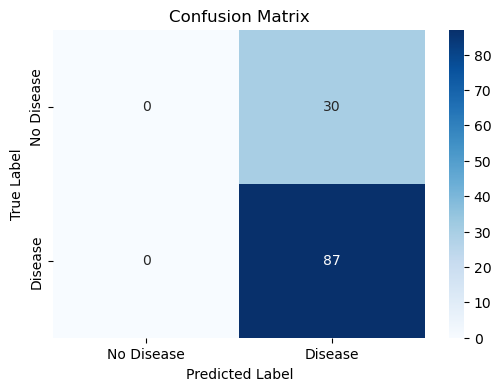

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Q3

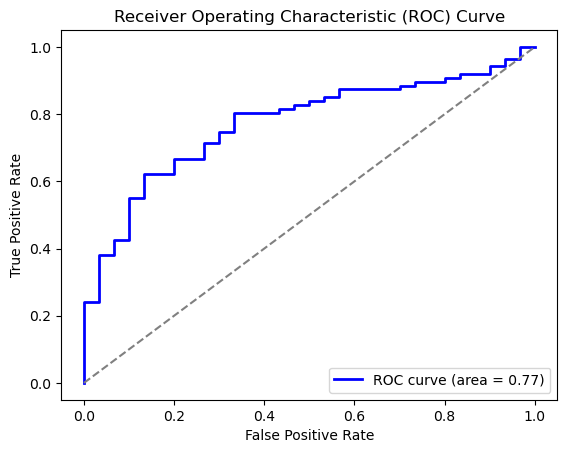

In [35]:
fpr, tpr, _ = roc_curve(y_test, logisticR.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [36]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_tree = dt_classifier.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", tree_accuracy)

Decision Tree Accuracy: 0.7094017094017094


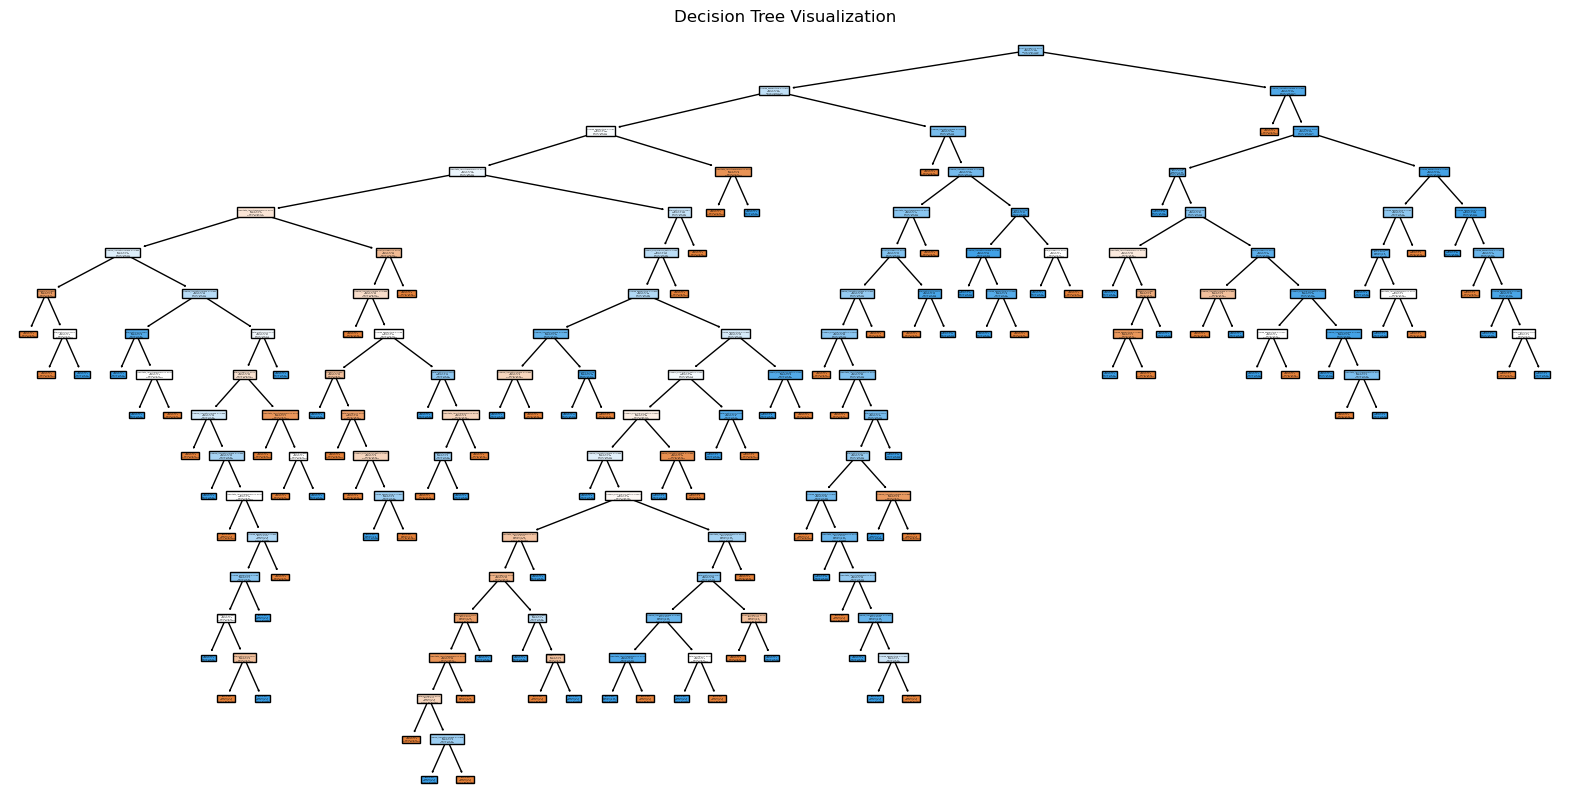

In [37]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=data.columns[:-1], class_names=['No Disease', 'Disease'])
plt.title("Decision Tree Visualization")
plt.show()

In [38]:
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Decision Tree Accuracy:", tree_accuracy)

Logistic Regression Accuracy: 0.7436
Decision Tree Accuracy: 0.7094017094017094


In [39]:
housing_data=pd.read_csv('Book1 (1).csv')
housing_data

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,13300000,7420,4,2,3,2,furnished
1,12250000,8960,4,4,4,3,furnished
2,12250000,9960,3,2,2,2,semi-furnished
3,12215000,7500,4,2,2,3,furnished
4,11410000,7420,4,1,2,2,furnished
...,...,...,...,...,...,...,...
244,4550000,5320,3,1,2,0,semi-furnished
245,4550000,5360,3,1,2,2,unfurnished
246,4550000,3520,3,1,1,0,semi-furnished
247,4550000,8400,4,1,4,3,unfurnished


In [40]:
encoder = LabelEncoder()
housing_data['furnishingstatus'] = encoder.fit_transform(housing_data['furnishingstatus'])

In [41]:
housing_data

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,13300000,7420,4,2,3,2,0
1,12250000,8960,4,4,4,3,0
2,12250000,9960,3,2,2,2,1
3,12215000,7500,4,2,2,3,0
4,11410000,7420,4,1,2,2,0
...,...,...,...,...,...,...,...
244,4550000,5320,3,1,2,0,1
245,4550000,5360,3,1,2,2,2
246,4550000,3520,3,1,1,0,1
247,4550000,8400,4,1,4,3,2


In [42]:
scaler = MinMaxScaler()
columns = housing_data.columns
scaled_features = scaler.fit_transform(housing_data)
housing_data = pd.DataFrame(scaled_features, columns=columns)

In [43]:
housing_data

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,1.000000,0.356777,0.50,0.333333,0.666667,0.666667,0.0
1,0.880096,0.469597,0.50,1.000000,1.000000,1.000000,0.0
2,0.880096,0.542857,0.25,0.333333,0.333333,0.666667,0.5
3,0.876099,0.362637,0.50,0.333333,0.333333,1.000000,0.0
4,0.784173,0.356777,0.50,0.000000,0.333333,0.666667,0.0
...,...,...,...,...,...,...,...
244,0.000799,0.202930,0.25,0.000000,0.333333,0.000000,0.5
245,0.000799,0.205861,0.25,0.000000,0.333333,0.666667,1.0
246,0.000799,0.071062,0.25,0.000000,0.000000,0.000000,0.5
247,0.000799,0.428571,0.50,0.000000,1.000000,1.000000,1.0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(housing_data.drop(columns=['price']), housing_data['price'], test_size=0.2, random_state=42)

In [45]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [46]:
linear_predictions = linear_model.predict(X_test)
print("MSE for Multiple Linear Regression:", mean_squared_error(y_test, linear_predictions))

MSE for Multiple Linear Regression: 0.02232453286305896


In [47]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [48]:
tree_predictions = decision_tree_model.predict(X_test)
print("MSE for Decision Tree Regressor:", mean_squared_error(y_test, tree_predictions))

MSE for Decision Tree Regressor: 0.07891167801170734


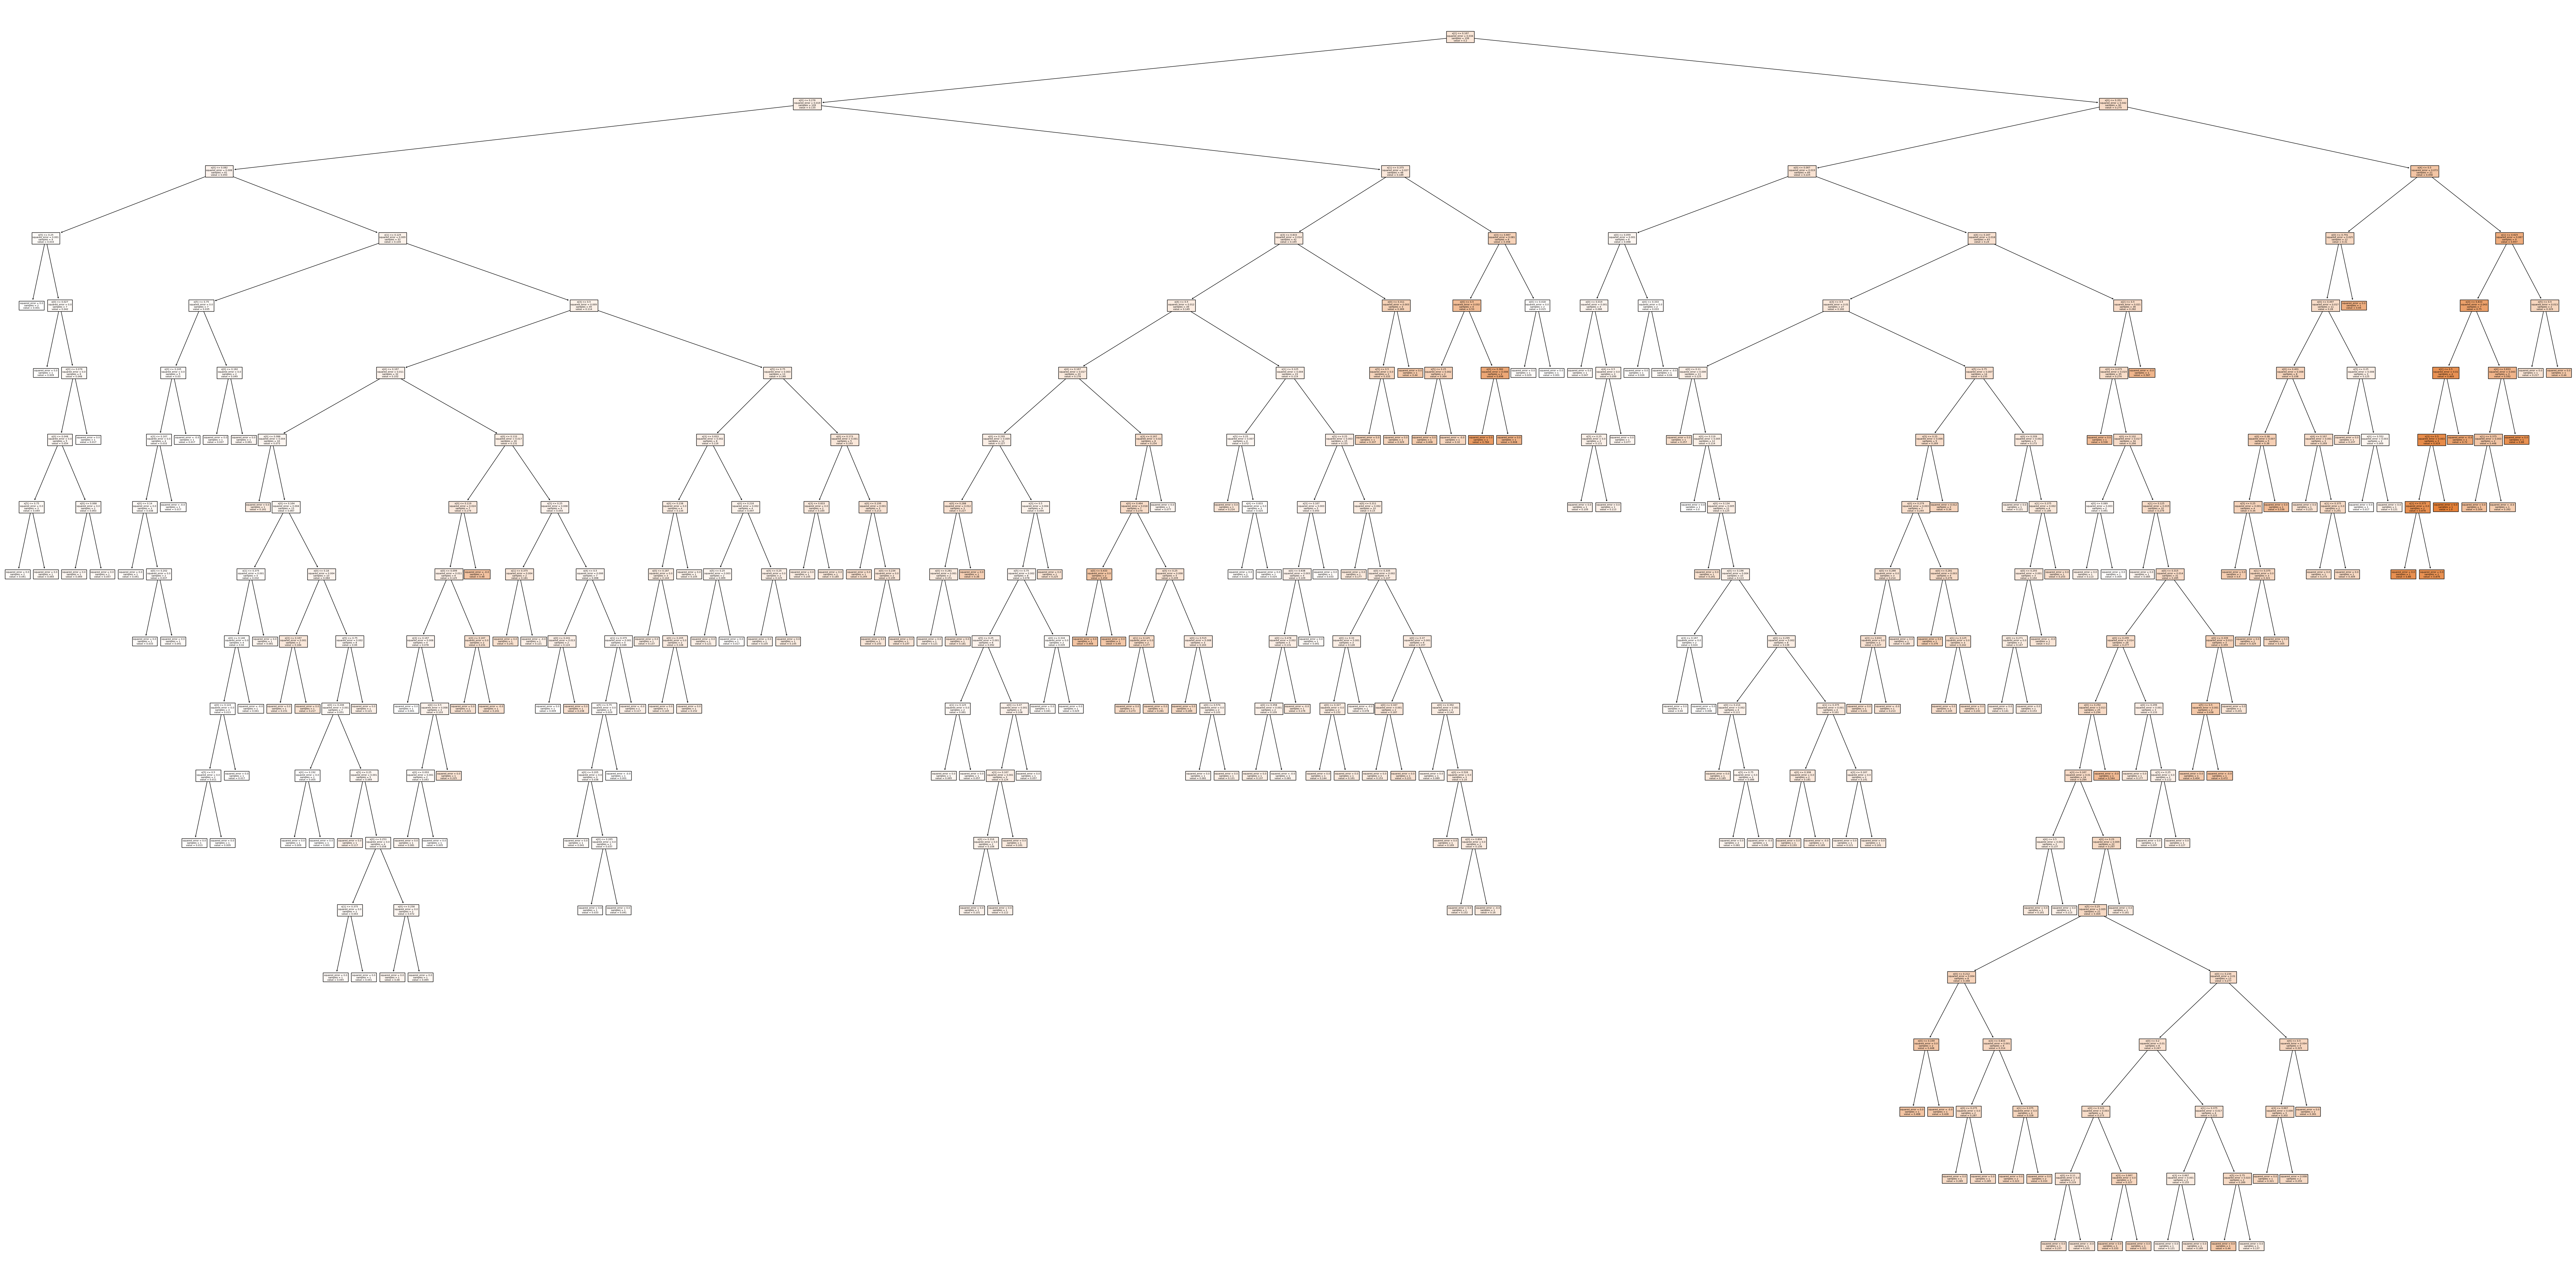

In [49]:
plt.figure(figsize=(100,50), dpi=100)
plot_tree(decision_tree_model, filled=True)
plt.show()

In [50]:
print("MSE for Multiple Linear Regression:", mean_squared_error(y_test, linear_predictions))
print("MSE for Decision Tree Regressor:", mean_squared_error(y_test, tree_predictions))

MSE for Multiple Linear Regression: 0.02232453286305896
MSE for Decision Tree Regressor: 0.07891167801170734


Multiple Linear Regression has a lower MSE (0.0223) compared to the Decision Tree Regressor (0.0789).
This means that Multiple Linear Regression provides better predictive accuracy for this dataset than the Decision Tree Regressor.
Decision Trees tend to overfit the data, leading to a higher error on the test set, whereas Linear Regression generalizes better in this case.